## Лабораторная работа 3.05
### Подготовил: Ярощук Владислав Викторович, М3208

Данные из таблицы в исходных величинах, 
В расчетах данные в СИ
В конце данные, как надо списать

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import polyfit, polyval

In [2]:
# Функция вычисления погрешности для набора значений
def calculationErr(arr):
    mean = arr.mean() # Среднее значение
    sko = np.sqrt(((arr - mean)**2).sum()/arr.shape[0]/(arr.shape[0] - 1)) # Среднекв. отклонение
    dx = 2.26*sko # Случайная погрешность, 2.26 - коэффициент Стьюдента для 10 измерений
    Ex = dx / mean * 100 # Относительная погрешность измерений [0..100%]
    return {"Среднее значение" : mean, "Среднекв. откл." : sko, "Случайная погр." : dx, "Относит. погр., %" : Ex}

In [3]:
# Данные для металлического образца
cond_df = pd.DataFrame({'T': [298, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
                       'I' : [1433, 1418, 1404, 1378, 1350, 1322, 1293, 1268, 1245, 1220, 1205],
                       'U' : [1.6, 1.61, 1.621, 1.642, 1.664, 1.686, 1.709, 1.730, 1.747, 1.768, 1.78]})
cond_df['I'] = cond_df['I']/1e6
cond_df['R'] = cond_df['U']/cond_df['I']
cond_df

,T,I,U,R
0,298,0.001433,1.600,1116.538730
1,300,0.001418,1.610,1135.401975
2,310,0.001404,1.621,1154.558405
3,320,0.001378,1.642,1191.582003
4,330,0.001350,1.664,1232.592593
5,340,0.001322,1.686,1275.340393
6,350,0.001293,1.709,1321.732405
7,360,0.001268,1.730,1364.353312
8,370,0.001245,1.747,1403.212851
9,380,0.001220,1.768,1449.180328


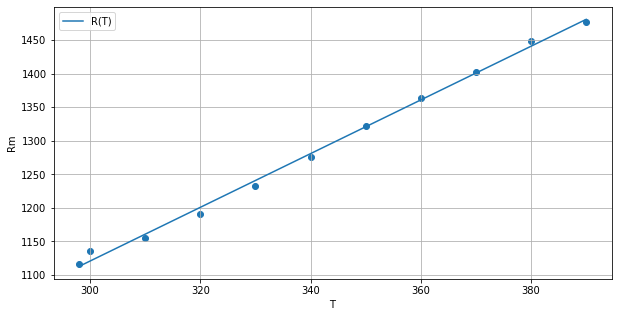

In [4]:
# Строим график зависимости сопротивления от температуры
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(298, 390, 100)

ax.set_xlabel("T")
ax.set_ylabel("Rm")

# plt.xticks(np.arange(300, 390, step=5))
# plt.yticks(np.arange(int(cond_df['R'].min()) - 4, cond_df['R'].max(), step=25))
ax.grid(True)
ax.scatter(cond_df['T'], cond_df['R'])
k1, k = polyfit(cond_df['T'], cond_df['R'], 1)
ax.plot(x, polyval([k1, k], x), label='R(T)')
ax.legend()

In [5]:
# Расчитываем среднее значение температурного коэффициента сопротивления
alphas = []
for i in range(cond_df.shape[0]//2):
    j = i + cond_df.shape[0]//2 + 1
    alphas.append((cond_df.iloc[i]['R'] - cond_df.iloc[j]['R']) / (cond_df.iloc[j]['R']*(cond_df.iloc[i]['T'] -273.15) - cond_df.iloc[i]['R']*(cond_df.iloc[j]['T'] -273.15) ))
meanA = sum(alphas) / len(alphas)

# Вычисляем параметры для ТКС
calculationErr(np.array(alphas))

{'Среднее значение': 0.004022583695588408,
 'Среднекв. откл.': 0.00011018288759418731,
 'Случайная погр.': 0.0002490133259628633,
 'Относит. погр., %': 6.190382719344229}

In [6]:
# Данные для полупроводникового образца
semicond_df = pd.DataFrame({'T': [298, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
                       'I' : [1018, 1062, 1280, 1501, 1721, 1898, 2270, 2400, 2520, 2600, 2660],
                       'U' : [1.153, 1.116, 0.947, 0.772, 0.602, 0.465, 0.388, 0.298, 0.216, 0.162, 0.122]})
semicond_df['I'] = semicond_df['I']/1e6
semicond_df['R'] = semicond_df['U']/semicond_df['I']
semicond_df['lnR'] = np.log(semicond_df['R'])
semicond_df['1/T'] = 1 / semicond_df['T']
semicond_df

,T,I,U,R,lnR,1/T
0,298,0.001018,1.153,1132.612967,7.032283,0.003356
1,300,0.001062,1.116,1050.847458,6.957352,0.003333
2,310,0.001280,0.947,739.843750,6.606439,0.003226
3,320,0.001501,0.772,514.323784,6.242853,0.003125
4,330,0.001721,0.602,349.796630,5.857352,0.003030
5,340,0.001898,0.465,244.994731,5.501237,0.002941
6,350,0.002270,0.388,170.925110,5.141226,0.002857
7,360,0.002400,0.298,124.166667,4.821625,0.002778
8,370,0.002520,0.216,85.714286,4.451020,0.002703
9,380,0.002600,0.162,62.307692,4.132085,0.002632


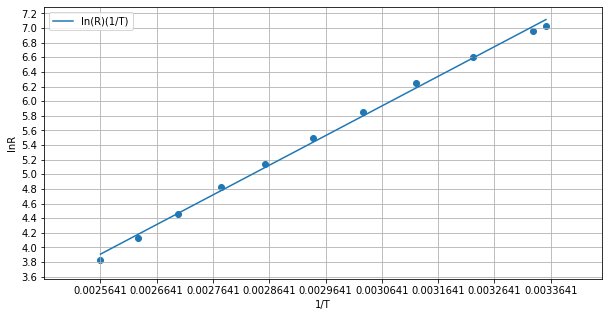

In [7]:
# Строим график зависимости ln(R)(1/T)
fig, ax = plt.subplots(figsize=(10, 5))
plt.yticks(np.arange(3, 8, step=0.2))
plt.xticks(np.arange(min(semicond_df['1/T']), max(semicond_df['1/T']) + 0.0001, step=0.0001))
ax.set_xlim(min(semicond_df['1/T']) - 0.0001, max((semicond_df['1/T'])) + 0.0001)
ax.scatter(semicond_df['1/T'], semicond_df['lnR'])
k1, k = polyfit(semicond_df['1/T'], semicond_df['lnR'], 1)
x = np.linspace(min(semicond_df['1/T']), max((semicond_df['1/T'])), 100)
ax.plot(x, polyval([k1, k], x), label='ln(R)(1/T)')
ax.set_xlabel("1/T")
ax.set_ylabel("lnR")
ax.legend()
ax.grid(True)

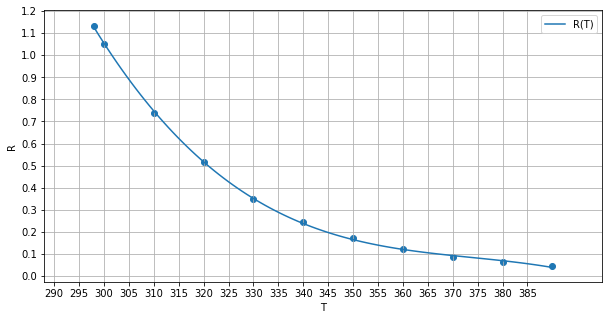

In [14]:
# Строим график зависимости R(T)
fig, ax = plt.subplots(figsize=(10, 5))
plt.yticks(np.arange(0, 1.5, step=0.1))
plt.xticks(np.arange(290, 390, step=5))
ax.set_xlim(min(semicond_df['T']) - 10, max((semicond_df['T'])) + 10)
ax.scatter(semicond_df['T'], semicond_df['R'])
k3, k2, k1, k = polyfit(semicond_df['T'], semicond_df['R'], 3)
x = np.linspace(min(semicond_df['T']), max((semicond_df['T'])), 100)
ax.plot(x, polyval([k3, k2, k1, k], x), label='R(T)')
ax.set_xlabel("T")
ax.set_ylabel("R")
ax.legend()
ax.grid(True)

In [9]:
# Вычисляем ширину запрещенной зоны
k_dzh = 1.380649e-23
k_ev = 8.61733e-5
Es_dzh = []
Es_ev = []
for i in range(semicond_df.shape[0]//2):
    j = i + semicond_df.shape[0]//2 + 1
    Es_dzh.append(-2 * k_dzh * semicond_df.iloc[i]['T'] * semicond_df.iloc[j]['T']/(semicond_df.iloc[i]['T'] - semicond_df.iloc[j]['T'])*np.log(semicond_df.iloc[i]['R'] / semicond_df.iloc[j]['R']))
    Es_ev.append(-2 * k_ev * semicond_df.iloc[i]['T'] * semicond_df.iloc[j]['T']/(semicond_df.iloc[i]['T'] - semicond_df.iloc[j]['T'])*np.log(semicond_df.iloc[i]['R'] / semicond_df.iloc[j]['R']))
meanE_dzh = sum(Es_dzh)/len(Es_dzh)
meanE_ev = sum(Es_ev)/len(Es_ev)

print("Ширина запрещенной зоны, Дж: ", meanE_dzh);
print("Ширина запрещенной зоны, эВ: ", meanE_ev);

Ширина запрещенной зоны, Дж:  1.1262508831495057e-19
Ширина запрещенной зоны, эВ:  0.7029502446234147


In [10]:
# Вычисляем параметры для ШЗЗ, Дж
calculationErr(np.array(Es_dzh))

{'Среднее значение': 1.1262508831495057e-19,
 'Среднекв. откл.': 3.123425395275084e-21,
 'Случайная погр.': 7.058941393321689e-21,
 'Относит. погр., %': 6.267645600935472}

In [11]:
# Вычисляем параметры для ШЗЗ, эВ
calculationErr(np.array(Es_ev))

{'Среднее значение': 0.7029502446234147,
 'Среднекв. откл.': 0.019494880568099338,
 'Случайная погр.': 0.0440584300839045,
 'Относит. погр., %': 6.2676456009354595}

In [12]:
# Таблица результатов для металлического образца
cond_df['I'] *= 1e6
cond_df['R'] /= 1000
cond_df

,T,I,U,R
0,298,1433.0,1.600,1.116539
1,300,1418.0,1.610,1.135402
2,310,1404.0,1.621,1.154558
3,320,1378.0,1.642,1.191582
4,330,1350.0,1.664,1.232593
5,340,1322.0,1.686,1.275340
6,350,1293.0,1.709,1.321732
7,360,1268.0,1.730,1.364353
8,370,1245.0,1.747,1.403213
9,380,1220.0,1.768,1.449180


In [13]:
# Таблица результатов для полупроводникового образца
semicond_df['I'] *= 1e6
semicond_df['R'] /= 1000
semicond_df['1/T'] *= 1e3
semicond_df

,T,I,U,R,lnR,1/T
0,298,1018.0,1.153,1.132613,7.032283,3.355705
1,300,1062.0,1.116,1.050847,6.957352,3.333333
2,310,1280.0,0.947,0.739844,6.606439,3.225806
3,320,1501.0,0.772,0.514324,6.242853,3.125000
4,330,1721.0,0.602,0.349797,5.857352,3.030303
5,340,1898.0,0.465,0.244995,5.501237,2.941176
6,350,2270.0,0.388,0.170925,5.141226,2.857143
7,360,2400.0,0.298,0.124167,4.821625,2.777778
8,370,2520.0,0.216,0.085714,4.451020,2.702703
9,380,2600.0,0.162,0.062308,4.132085,2.631579


### Вывод
На основе проведенных измерений мы получили зависимость электрического сопротивления металлического и полупроводникового образцов от температуры. Установили характер поведения сопротивления с изменением температуры: при повышении температуры сопротивление металла увеличивается из-за увечичения количества столкновений электронов с кристаллической решеткой атома по причине увеличения интенсивности теплового движения электронов. Для полупроводника напротив установлено, что с увеличением температуры увеличивается количество свободных пар электрон-дырка, увеличивается проводимость, уменьшается электрическое сопротивления. По результатам измерений вычислен температурный коэффициент сопротивления металла и ширина запрещенной зоны полупроводника